In [2]:
from torch import nn
import torch
torch.manual_seed(42)

In [3]:
w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

In [4]:
# Define Prediction Function

def forward(x):
    yhat = torch.mm(x, w) + b
    return yhat

In [5]:
# Calculate yhat

x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print("The result: ", yhat)

The result:  tensor([[9.]], grad_fn=<AddBackward0>)


In [6]:
# Sample tensor X

X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])

yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


<h2 id="Linear">Class Linear</h2>

In [7]:
# Make a linear regression model using build-in function

model = nn.Linear(2, 1)

In [8]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[1.5488]], grad_fn=<AddmmBackward0>)


In [9]:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[0.9619],
        [1.5488],
        [2.1357]], grad_fn=<AddmmBackward0>)


<h2 id="Cust">Build Custom Modules </h2>

In [10]:
class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [11]:
model = linear_regression(2, 1)

In [12]:
# Print model parameters

print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6496, -0.1549]], requires_grad=True), Parameter containing:
tensor([0.1427], requires_grad=True)]


In [13]:
# Print model parameters

print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.6496, -0.1549]])), ('linear.bias', tensor([0.1427]))])


In [14]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[0.4824]], grad_fn=<AddmmBackward0>)


In [15]:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[0.6373],
        [0.4824],
        [0.3275]], grad_fn=<AddmmBackward0>)


In [16]:
X = torch.tensor([[11.0, 12.0, 13, 14], [11, 12, 13, 14]])
model2 = linear_regression(4, 1)
yhat2 = model2(X)
print("The result: ", yhat)

The result:  tensor([[0.6373],
        [0.4824],
        [0.3275]], grad_fn=<AddmmBackward0>)


<h2>Multiple Linear Regression Training</h2>

In [17]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(42)

In [18]:

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [19]:
class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [20]:
data_set = Data2D()

In [21]:
class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat


In [22]:
model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[0.1102, 0.5713]], requires_grad=True), Parameter containing:
tensor([0.0773], requires_grad=True)]


In [23]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()
# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

Before Training: 


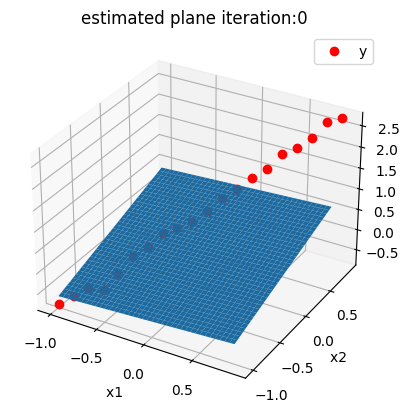

After Training: 


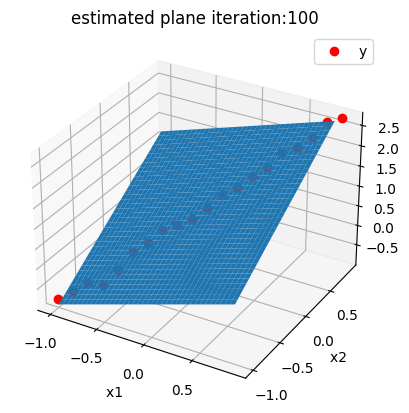

In [24]:
# Train the model

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

Text(0, 0.5, 'Cost/total loss ')

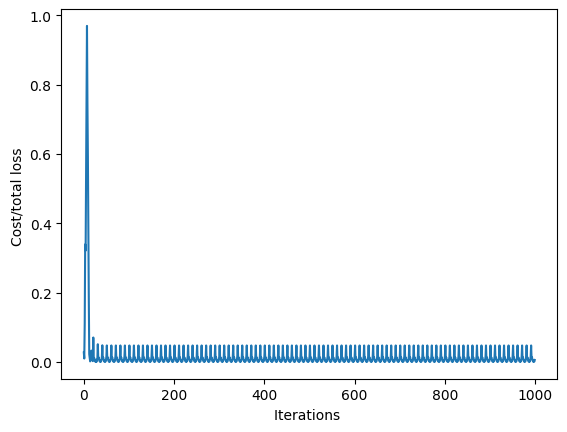

In [25]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

<h2>İf batchsize=30</h2>

In [26]:
dataset_2=Data2D()

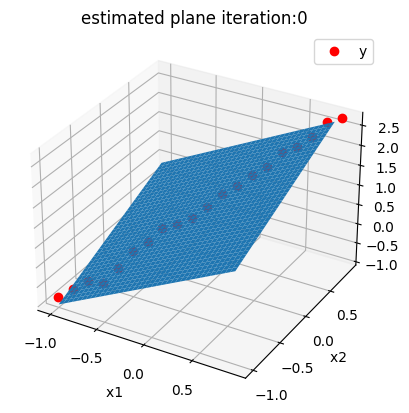

Text(0, 0.5, 'Cost/total loss ')

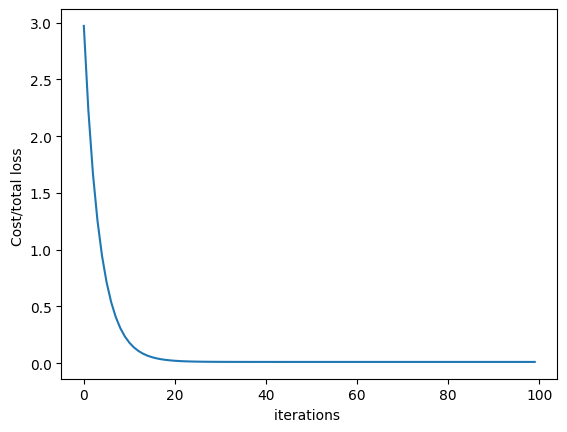

In [27]:

train_loader = DataLoader(dataset = dataset_2, batch_size = 30)
model1 = linear_regression(2, 1)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)
LOSS1 = []
epochs = 100
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model1(x)
            loss = criterion(yhat,y)
            LOSS1.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
Plot_2D_Plane(model1 , dataset_2)  
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")


In [28]:
torch.manual_seed(2)

validation_data = Data2D()
Y = validation_data.y

X = validation_data.x
print("total loss or cost for model: ",criterion(model(X),Y))
print("total loss or cost for model: ",criterion(model1(X),Y))

total loss or cost for model:  tensor(0.0095, grad_fn=<MseLossBackward0>)
total loss or cost for model:  tensor(0.0087, grad_fn=<MseLossBackward0>)


<h2> Multiple Output </h2>

In [29]:
model=linear_regression(1,10)
model(torch.tensor([1.0]))

tensor([ 0.8633, -0.3396, -0.1156, -0.4718,  0.2196, -0.2549,  1.1448,  0.9684,
        -0.0452,  0.4465], grad_fn=<AddBackward0>)

In [30]:
list(model.parameters())
x=torch.tensor([[1.0]])

In [31]:
yhat=model(x)
yhat

tensor([[ 0.8633, -0.3396, -0.1156, -0.4718,  0.2196, -0.2549,  1.1448,  0.9684,
         -0.0452,  0.4465]], grad_fn=<AddmmBackward0>)

In [32]:
X=torch.tensor([[1.0],[1.0],[3.0]])
Yhat=model(X)
Yhat

tensor([[ 0.8633, -0.3396, -0.1156, -0.4718,  0.2196, -0.2549,  1.1448,  0.9684,
         -0.0452,  0.4465],
        [ 0.8633, -0.3396, -0.1156, -0.4718,  0.2196, -0.2549,  1.1448,  0.9684,
         -0.0452,  0.4465],
        [ 1.7423, -1.1074, -0.5587, -1.5683, -0.4084, -2.1081,  1.9982,  1.7461,
          0.3521,  1.4284]], grad_fn=<AddmmBackward0>)

In [33]:
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [34]:
data_set=Data()

In [36]:
model=linear_regression(2,2)
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()

In [37]:
train_loader=DataLoader(dataset=data_set,batch_size=5)

In [38]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
     



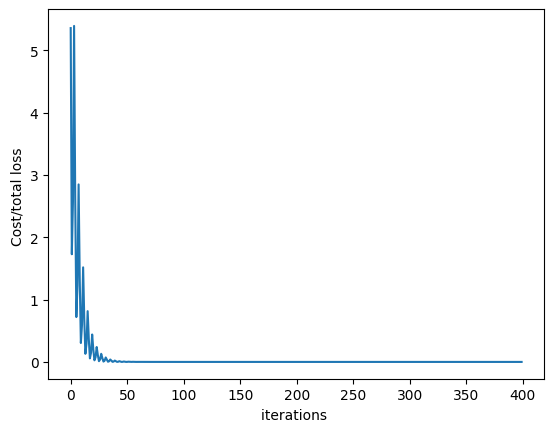

In [39]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()